# Visualization of DensePose-PoseTrack dataset

In this notebook, we visualize the DensePose-PoseTrack annotations on the images.

The DensePose-PoseTrack dataset annotations are provided within the coco annotation framework and can be handled directly using the pycocotools.


In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pycocotools.coco import COCO
from skimage.draw import polygon
from random import randint

# Read the densepose_posetrack_val file.
JSON_File_Val = 'densepose_posetrack_val2017.json'
coco = COCO(JSON_File_Val)

loading annotations into memory...
Done (t=2.04s)
creating index...
index created!


Let's filter out images that has no densepose annotations:

In [6]:
## find imgids of a specific video name.
DataFolder = '/p42tb/PoseTrack/posetrack_data/'
#
img_Ids= coco.getImgIds()
imgs = coco.loadImgs(img_Ids)
#
DP_images = []
for img in imgs:
    if 'has_no_densepose' in img.keys():
        # Ignoring frames with no densepose supervision.
        pass
    else:
        DP_images.append(img)

Let's select a random image and visualize:
 - the keypoints using the coco.showAnns function.
 - the ignore regions using the provided polygons.


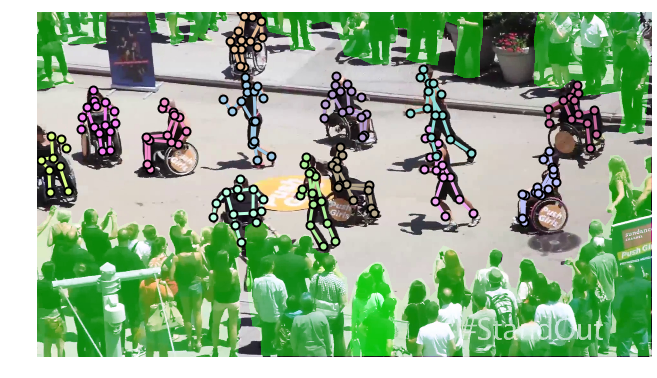

In [12]:
Selected_im = DP_images[randint(0, len(DP_images))] # Choose im no 343 to replicate 
Selected_im= DP_images[343]
ann_ids = coco.getAnnIds( imgIds=Selected_im['id'] )
anns = coco.loadAnns(ann_ids)

# Read image
I = cv2.imread(DataFolder + Selected_im['file_name']) 

# Visualize ignore regions.
for region_x, region_y in zip( Selected_im['ignore_regions_x'],Selected_im['ignore_regions_y']):
    rr, cc = polygon(region_y, region_x, I.shape)
    I[rr, cc, 1] = 128 + I[rr, cc, 1]/2
##
fig = plt.figure(figsize=[11,11])
plt.imshow(I[:,:,::-1]); plt.axis('off')

# Visualize keypoints.
coco.showAnns(anns)
plt.show()

Let's visualize the DensePose annotations:

For each collected point we have the surface patch index, and UV coordinates.

The following snippet creates plots colored by I U and V coordinates respectively.

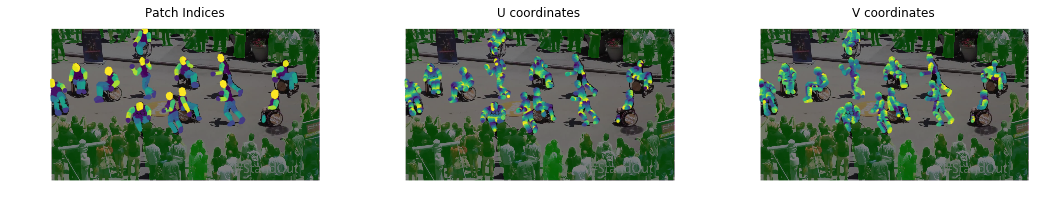

In [13]:
# Show images for each subplot.
fig = plt.figure(figsize=[18,6])
plt.subplot(1,3,1)
plt.imshow(I[:,:,::-1]/2);plt.axis('off');plt.title('Patch Indices')
plt.subplot(1,3,2)
plt.imshow(I[:,:,::-1]/2);plt.axis('off');plt.title('U coordinates')
plt.subplot(1,3,3)
plt.imshow(I[:,:,::-1]/2);plt.axis('off');plt.title('V coordinates')

## For each ann, scatter plot the collected points.
for ann in anns:
    bbr =  np.round(ann['bbox']) 
    if( 'dp_masks' in ann.keys()):
        Point_x = np.array(ann['dp_x'])/ 255. * bbr[2] # Strech the points to current box.
        Point_y = np.array(ann['dp_y'])/ 255. * bbr[3] # Strech the points to current box.
        #
        Point_I = np.array(ann['dp_I'])
        Point_U = np.array(ann['dp_U'])
        Point_V = np.array(ann['dp_V'])
        #
        x1,y1,x2,y2 = bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
        x2 = min( [ x2,I.shape[1] ] ); y2 = min( [ y2,I.shape[0] ] )
        ###############
        Point_x = Point_x + x1 ; Point_y = Point_y + y1
        plt.subplot(1,3,1)
        plt.scatter(Point_x,Point_y,11,Point_I,cmap='viridis',linewidths=0,marker='o')
        plt.subplot(1,3,2)
        plt.scatter(Point_x,Point_y,11,Point_U,cmap='viridis',linewidths=0,marker='o')
        plt.subplot(1,3,3)
        plt.scatter(Point_x,Point_y,11,Point_V,cmap='viridis',linewidths=0,marker='o')
        
plt.show()